In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from knn import KNN

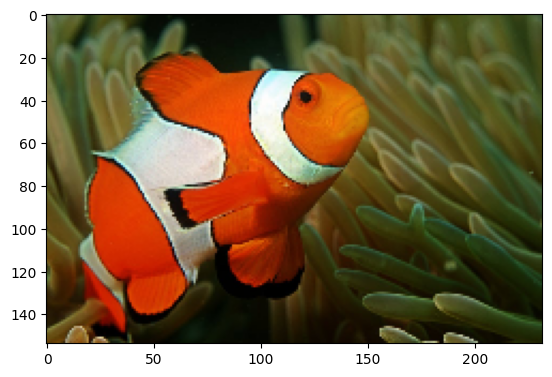

In [3]:
nemo = cv2.imread('input/nemo.jpg')
nemo = cv2.resize(nemo, (0, 0), fx=0.25, fy=0.25)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

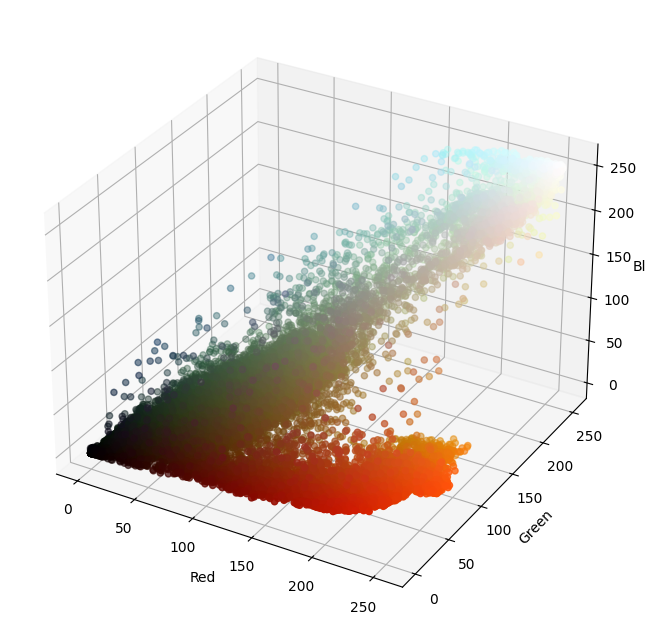

In [4]:
pixels_list_rgb = nemo.reshape(-1, 3)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [5]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

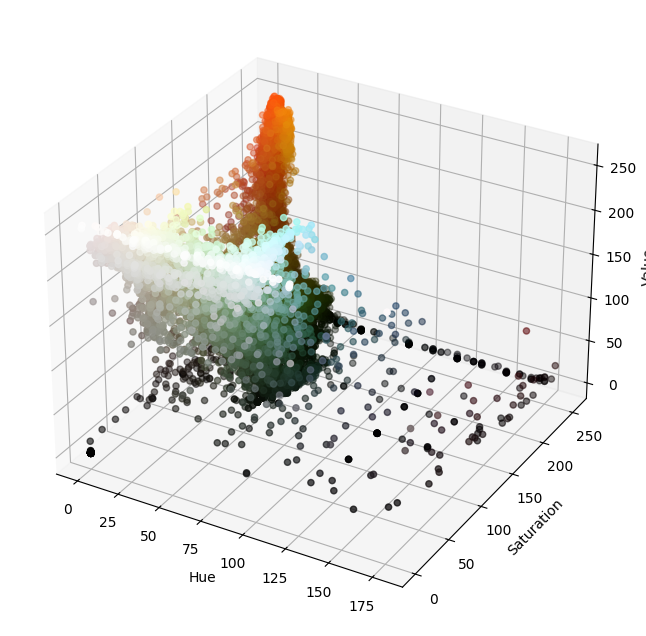

In [6]:
pixels_list_hsv = nemo_hsv.reshape(-1, 3)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

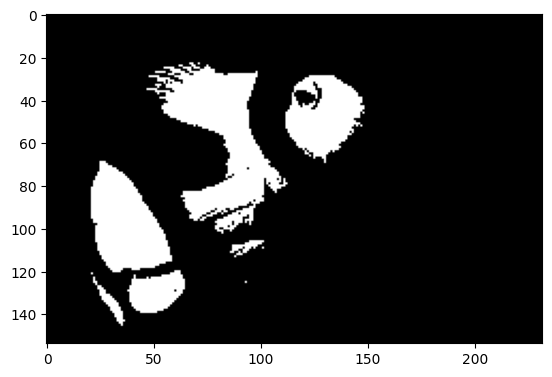

In [7]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap='gray')
plt.show()

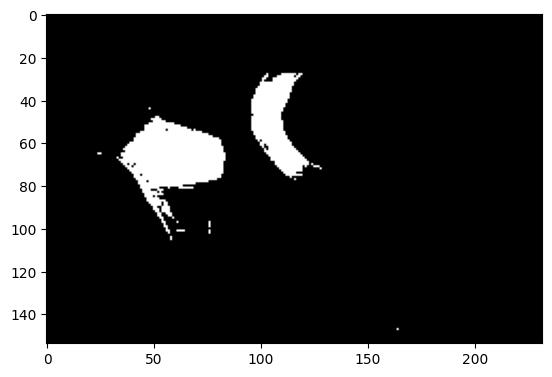

In [8]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.show()

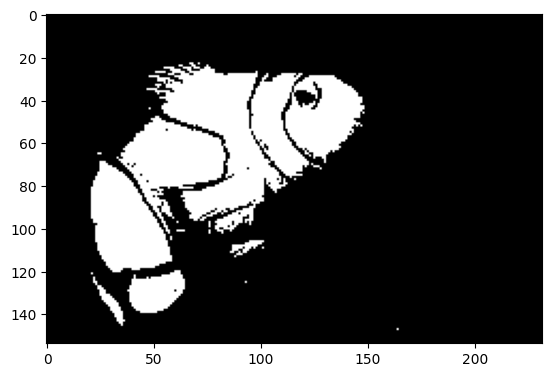

In [9]:
final_mask = mask_orange + mask_white
plt.imshow(final_mask, cmap='gray')
plt.show()

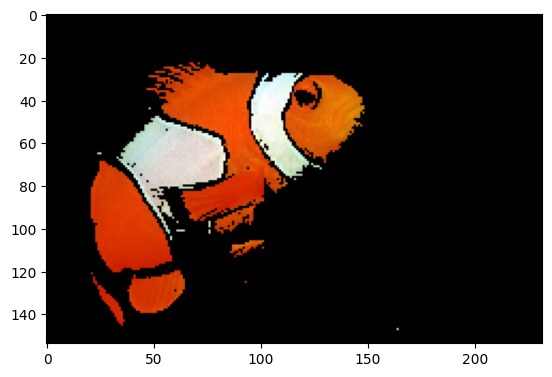

In [10]:
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.imshow(final_result)
plt.show()

In [11]:
X_train = pixels_list_hsv / 255
X_train.shape

(35728, 3)

In [12]:
Y_train = final_mask.reshape(-1,) // 255
Y_train.shape

(35728,)

In [13]:
knn = KNN(k=3)
knn.fit(X_train, Y_train)

In [14]:
new_pixel = np.array([100, 100, 0]) / 255
knn.predict([new_pixel])

array([0], dtype=int64)

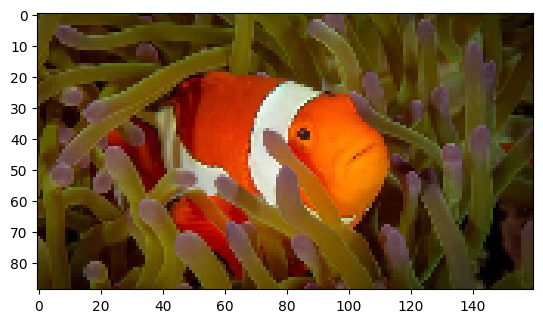

In [15]:
dashe_nemo = cv2.imread('input/dashe-nemo.jpg')
dashe_nemo = cv2.resize(dashe_nemo, (0, 0), fx=0.25, fy=0.25)
dashe_nemo = cv2.cvtColor(dashe_nemo, cv2.COLOR_BGR2RGB)
plt.imshow(dashe_nemo)
plt.show()

In [16]:
dashe_nemo_hsv = cv2.cvtColor(dashe_nemo, cv2.COLOR_RGB2HSV)
dashe_nemo_hsv.shape

(89, 160, 3)

In [17]:
X_test = dashe_nemo_hsv.reshape(-1, 3) / 255
X_test.shape

(14240, 3)

In [18]:
Y_pred = knn.predict(X_test)

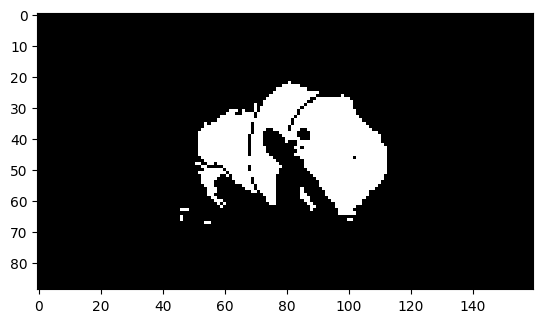

In [19]:
output = Y_pred.reshape(dashe_nemo.shape[:2])
plt.imshow(output, cmap='gray')
plt.show()

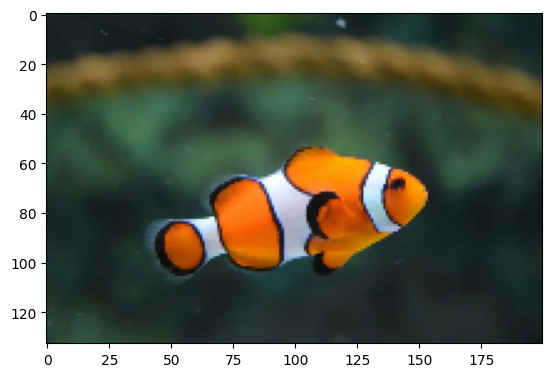

In [20]:
abjie_nemo = cv2.imread('input/abjie-nemo.jpg')
abjie_nemo = cv2.resize(abjie_nemo, (0, 0), fx=0.1, fy=0.1)
abjie_nemo = cv2.cvtColor(abjie_nemo, cv2.COLOR_BGR2RGB)
plt.imshow(abjie_nemo)
plt.show()

In [21]:
abjie_nemo_hsv = cv2.cvtColor(abjie_nemo, cv2.COLOR_RGB2HSV)

In [22]:
X_test = abjie_nemo_hsv.reshape(-1, 3) / 255

In [23]:
Y_pred = knn.predict(X_test)

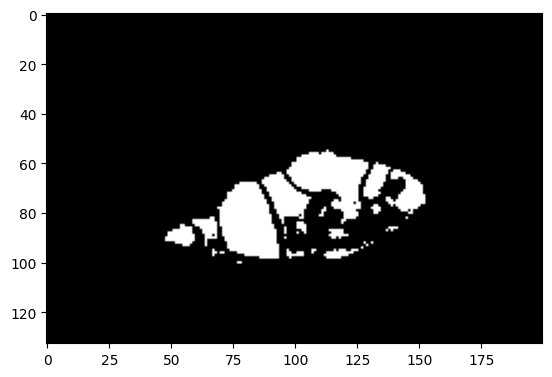

In [24]:
output = Y_pred.reshape(abjie_nemo.shape[:2])
plt.imshow(output, cmap='gray')
plt.show()

In [25]:
output = output.astype('uint8')

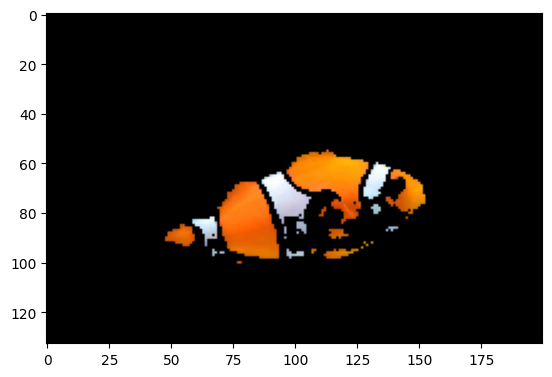

In [26]:
final_result = cv2.bitwise_and(abjie_nemo, abjie_nemo, mask=output)
plt.imshow(final_result)
plt.show()